In [13]:
import torch
import numpy as np
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import DataLoader

from itertools import cycle
from tqdm.auto import trange
from tqdm.notebook import tqdm

from matplotlib import cm
import matplotlib.pyplot as plt

from utils import plot_utils, s3w_utils, vmf_utils, utils
from utils.nf import normalizing_flows
from methods import s3w, ssw, sw

from experiments import gf_particles, gd_sphere

from scipy.stats import gaussian_kde

device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

In [14]:
mu_target = [0,1,0]
mu_target = mu_target / np.linalg.norm(mu_target)

kappa_target = 10

X_target = torch.tensor(vmf_utils.rand_vmf(mu_target, kappa=kappa_target, N=10000), dtype=torch.float)


## Gradient Flow on Particles

In [15]:
X0 = torch.randn((500, 3), device=device)
X0 = F.normalize(X0, p=2, dim=-1)
X0.requires_grad_(True)
L = [X0.clone()]
L_loss = []

In [16]:
d_func = s3w.s3wd 
d_args = {'p': 2, 'n_projs': 10000, 'device': device}

L, L_loss = gf_particles.run_exp(X_target, X0, d_func , d_args, device, n_steps=1001, lr=1, batch_size=500)

100%|███████████████████████████████████████████████████| 1001/1001 [00:09<00:00, 102.89it/s, Loss = 3.526]


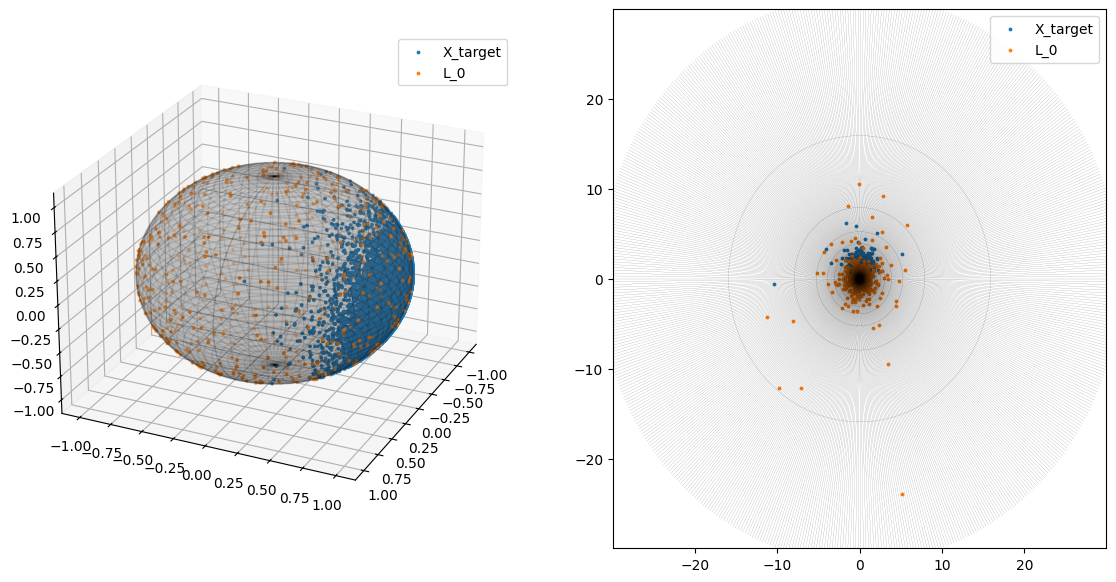

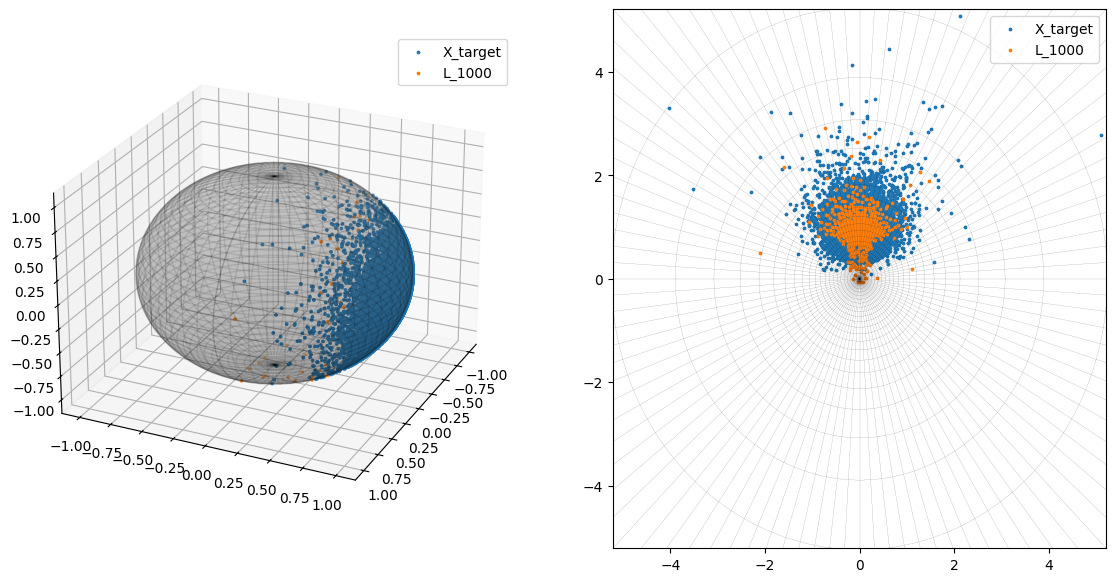

In [17]:
for k in [0, 1000]:
    X_target_cpu = X_target.cpu().detach().numpy()
    L_k_cpu = L[k].cpu().detach().numpy()

    datasets = [X_target_cpu, L_k_cpu]
    labels = ['X_target', f'L_{k}']

    plot_utils.plot_all(datasets, labels, view_init=(25, 25))

In [18]:
utils.compute_paalc(L_loss, 1001, max(L_loss))

95.3942401150675

100%|███████████████████████████████████████████████████| 3001/3001 [00:30<00:00, 99.51it/s, Loss = 30.061]


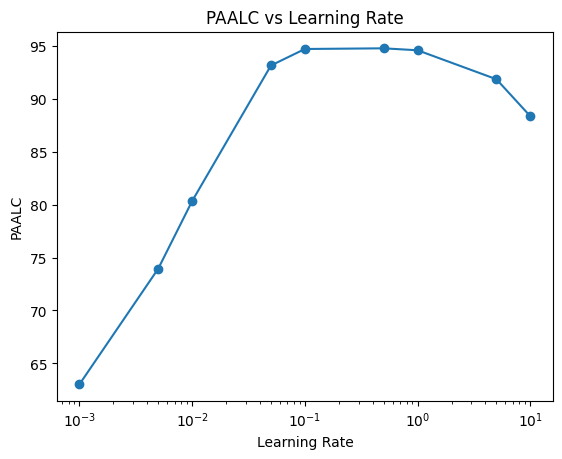

In [19]:
X0_base = torch.randn((500, 3), device=device)
X0_base = F.normalize(X0_base, p=2, dim=-1)

d_func = s3w.s3wd  # Your distance function
d_args = {'p': 2, 'n_projs': 10000, 'device': device}

learning_rates = [10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
paalc_values = []

for lr in learning_rates:
    X0 = X0_base.clone().detach()
    X0.requires_grad_(True)
    
    L, L_loss = gf_particles.run_exp(X_target, X0, d_func, d_args, device, n_steps=3001, lr=lr, batch_size=500)
    
    paalc = utils.compute_paalc(L_loss, 3001, max(L_loss))
    paalc_values.append(paalc)

#     for k in [0, 1000]:
#         X_target_cpu = X_target.cpu().detach().numpy()
#         L_k_cpu = L[k].cpu().detach().numpy()

#         datasets = [X_target_cpu, L_k_cpu]
#         labels = ['X_target', f'L_{k}']

#         plot_utils.plot_all(datasets, labels, view_init=(25, 25))

plt.figure()
plt.plot(learning_rates, paalc_values, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('PAALC')
plt.title('PAALC vs Learning Rate')
plt.xscale('log') 
plt.show()

In [ ]:
X0_base = torch.randn((500, 3), device=device)
X0_base = F.normalize(X0_base, p=2, dim=-1)

d_func = ssw.sswd  # Your distance function
d_args = {'p': 2, 'num_projections': 10000, 'device': device}

learning_rates = [100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
paalc_values = []

for lr in learning_rates:
    X0 = X0_base.clone().detach()
    X0.requires_grad_(True)
    
    L, L_loss = gf_particles.run_exp(X_target, X0, d_func, d_args, device, n_steps=3001, lr=lr, batch_size=500)
    
    paalc = utils.compute_paalc(L_loss, 3001, max(L_loss))
    paalc_values.append(paalc)

#     for k in [0, 1000]:
#         X_target_cpu = X_target.cpu().detach().numpy()
#         L_k_cpu = L[k].cpu().detach().numpy()

#         datasets = [X_target_cpu, L_k_cpu]
#         labels = ['X_target', f'L_{k}']

#         plot_utils.plot_all(datasets, labels, view_init=(25, 25))

plt.figure()
plt.plot(learning_rates, paalc_values, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('PAALC')
plt.title('PAALC vs Learning Rate')
plt.xscale('log') 
plt.show()

 18%|█████████▋                                           | 545/3001 [04:49<21:33,  1.90it/s, Loss = 0.000]